The dataset for this project comes from a Minecraft research server operated by the Pacific Laboratory for Artificial Intelligence (PLAI), a computer science research group at UBC led by Professor Frank Wood. PLAI studies generative modeling, programming, and AI. Their PLAICraft initiative collects large-scale behavioral data from real players navigating a shared virtual server in Minecraft. Every player who joins the server contributes to a growing dataset that supports research on how humans play video games and how they interact within this specific environment.

Game analytics plays a central role in understanding how people interact with digital environments. By examining patterns in player activity such as a player's session frequency, duration, and engagement levels, we can further research about human behavior and AI to better predict resource allocation and user engagement. Since this server is an active research project rather than a commercial game, understanding player behavior and activity levels is essential so they can plan server hardware, storage, and data-processing resources effectively. Specifically, being able to identify which players engage the most with the game can support targeted recruitment and improved strategies for maintaining long-term engagement



This leads us to the central question of this project:

**Can player characteristics predict the total number of hours a player spends on the server?**

We will use **experience**, **gender**, and **Age** as explanatory variables to predict the response variable **played_hours**. These predictors were chosen because they are the only available player characteristics that could reasonably influence engagement patterns and help explain differences in total time spent on the server.

This project uses two datasets from the Minecraft research server: **players.csv** and **sessions.csv**.  
The **players** file contains 196 rows and 7 variables describing each participant, and the **sessions** file contains 1,535 rows documenting every recorded session.  
Below is a concise summary of all variables.


## Variables in `players.csv`

- **Age** – numeric, with 2 missing values  
- **gender** – categorical  
- **experience** – ordered categorical skill level  
- **played_hours** – numeric lifetime Minecraft hours (highly skewed)  
- **subscribe** – logical indicator of newsletter subscription  
- **name** – string player nickname  
- **hashedEmail** – string identifier used to link datasets  


## Variables in `sessions.csv`

- **start_time** – readable start timestamp  
- **end_time** – readable end timestamp, with 2 missing values  
- **original_start_time** – Unix start timestamp  
- **original_end_time** – Unix end timestamp  
- **hashedEmail** – player identifier linking to `players.csv`

## Issues and Notes

- Some missing values in both datasets  
- Large variation in lifetime hours and number of sessions per player  
- Self-reported values may include bias  
- Session logs may be incomplete or uneven  
- Voluntary participation may introduce selection bias  

By joining these tables on **hashedEmail**, we can link player characteristics to their session histories and total hours played, allowing us to build and evaluate predictive models.


In [8]:
library(tidyverse)
library(tidymodels)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [21]:
players_dataset <- read.csv("https://drive.google.com/uc?export=download&id=1uLgyqhTWde6lDwTPmpDHTHndMKkr0eGn")
players_dataset

players_wrangled <- players_dataset |>
    select(Age, gender, experience, played_hours) |>
    mutate(experience = as_factor(experience), gender = as_factor(gender))
players_wrangled

players_summarized <- players_wrangled |>
    summarize(Mean_age = mean(Age, na.rm = TRUE))
players_summarized

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


Age,gender,experience,played_hours
<int>,<fct>,<fct>,<dbl>
9,Male,Pro,30.3
17,Male,Veteran,3.8
17,Male,Veteran,0.0
21,Female,Amateur,0.7
21,Male,Regular,0.1
17,Female,Amateur,0.0
19,Female,Regular,0.0
21,Male,Amateur,0.0
47,Male,Amateur,0.1


Mean_age
<dbl>
21.13918


In [46]:
players_cleaned <- players_wrangled |> mutate(
  gender = case_match(gender, "Male" ~ "Male", "Female" ~ "Female", .default = "Other"))
gender_players

players_cleaned |> group_by(gender) |>
  summarise(count = n())

Age,gender,experience,played_hours
<int>,<chr>,<fct>,<dbl>
9,Male,Pro,30.3
17,Male,Veteran,3.8
17,Male,Veteran,0.0
21,Female,Amateur,0.7
21,Male,Regular,0.1
17,Female,Amateur,0.0
19,Female,Regular,0.0
21,Male,Amateur,0.0
47,Male,Amateur,0.1


gender,count
<chr>,<int>
Female,37
Male,124
Other,35


Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_point()`).”


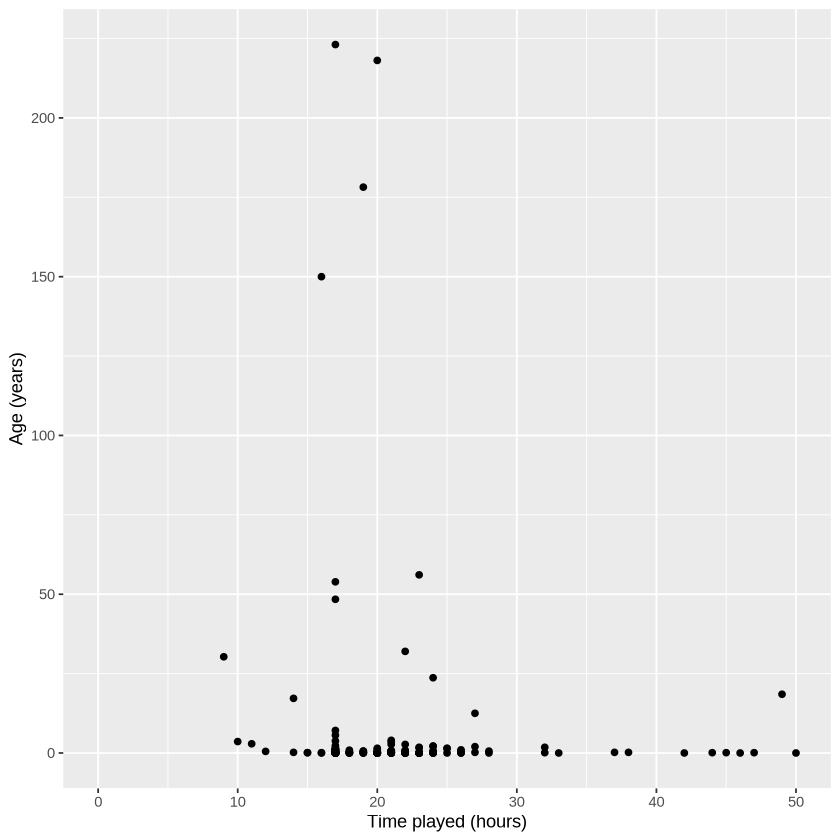

Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_point()`).”


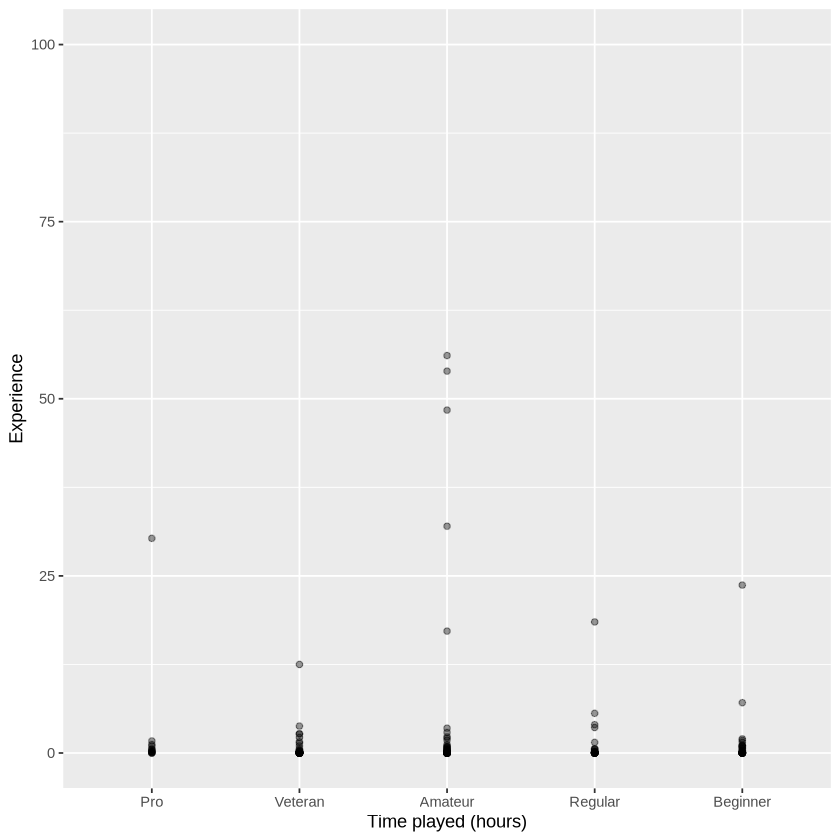

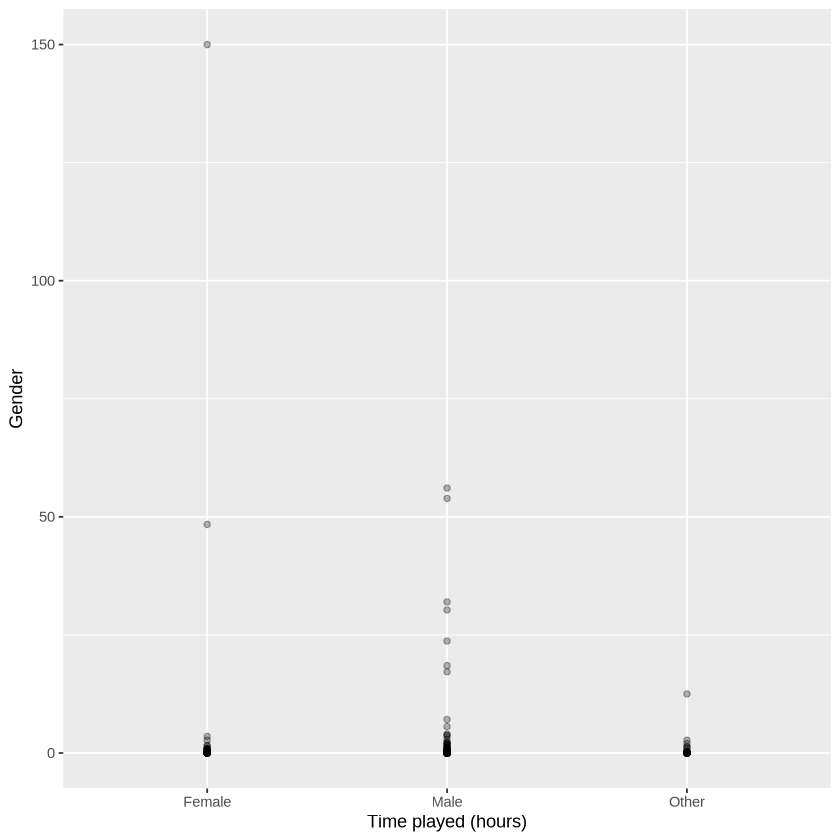

In [54]:
age_plot <- ggplot(players_cleaned, aes(x = Age, y = played_hours)) +
    geom_point() +
    xlab("Time played (hours)") +
    ylab("Age (years)") +
    xlim(0,50)
age_plot

experience_plot <- ggplot(players_cleaned, aes(x = experience, y = played_hours)) +
    geom_point(alpha = 0.4) +
    xlab("Time played (hours)") +
    ylab("Experience") +
    scale_y_continuous(limits = c(0, 100))
experience_plot

gender_plot <- ggplot(players_cleaned, aes(x = gender, y = played_hours)) +
    geom_point(alpha = 0.3) +
    xlab("Time played (hours)") +
    ylab("Gender") +
    scale_y_continuous(limits = c(0, 150))
gender_plot
